<a href="https://colab.research.google.com/github/sarimiro56/BigData_Python/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime, date, time

warnings.filterwarnings('ignore')    #실행 시 warnings을 띄우지 말고 무시.

In [3]:
path = './대전/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xlsx')]
file_list_py

['대전태평(암반)_2013_hr.xlsx',
 '대전태평(암반)_2015_hr.xlsx',
 '대전태평(암반)_2009_hr.xlsx',
 '대전태평(암반)_2014_hr.xlsx',
 '대전태평(암반)_2011_hr.xlsx',
 '대전태평(암반)_2012_hr.xlsx',
 '대전태평(암반)_2010_hr.xlsx',
 '대전태평(암반)_2016_hr.xlsx']

In [4]:
df = pd.DataFrame()
for i in file_list_py:
  data = pd.read_excel(path + i)
  df = pd.concat([df, data])
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20130101,0,16.4,44.30,740
1,대전태평,(암반),20130101,1,16.4,44.30,740
2,대전태평,(암반),20130101,2,16.4,44.30,740
3,대전태평,(암반),20130101,3,16.4,44.30,740
4,대전태평,(암반),20130101,4,16.4,44.30,740
...,...,...,...,...,...,...,...
8761,대전태평,(암반),20161231,19,16.2,44.49,725
8762,대전태평,(암반),20161231,20,16.2,44.49,725
8763,대전태평,(암반),20161231,21,16.2,44.49,725
8764,대전태평,(암반),20161231,22,16.2,44.49,725


In [5]:
df = df.reset_index(drop=True)
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20130101,0,16.4,44.30,740
1,대전태평,(암반),20130101,1,16.4,44.30,740
2,대전태평,(암반),20130101,2,16.4,44.30,740
3,대전태평,(암반),20130101,3,16.4,44.30,740
4,대전태평,(암반),20130101,4,16.4,44.30,740
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20161231,19,16.2,44.49,725
69544,대전태평,(암반),20161231,20,16.2,44.49,725
69545,대전태평,(암반),20161231,21,16.2,44.49,725
69546,대전태평,(암반),20161231,22,16.2,44.49,725


In [6]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69548 entries, 0 to 69547
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관측소       69548 non-null  object 
 1   구분        69548 non-null  object 
 2   날짜        69548 non-null  int64  
 3   시간        69548 non-null  int64  
 4   수온(℃)     69548 non-null  float64
 5   수위(el.m)  69548 non-null  float64
 6   EC(㎲/㎝)   69548 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.7+ MB


In [7]:
df['Date'] = pd.to_datetime(df['날짜'],format='%Y%m%d') +\
  pd.to_timedelta(df['시간'].astype(int),unit='h')

df.set_index(df['Date'], inplace=True)
df.head(3)

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Date
Date,,,,,,,,
2013-01-01 00:00:00,대전태평,(암반),20130101,0,16.4,44.3,740,2013-01-01 00:00:00
2013-01-01 01:00:00,대전태평,(암반),20130101,1,16.4,44.3,740,2013-01-01 01:00:00
2013-01-01 02:00:00,대전태평,(암반),20130101,2,16.4,44.3,740,2013-01-01 02:00:00


In [8]:
df1 = df[['수온(℃)', '수위(el.m)','EC(㎲/㎝)']]
df1.columns = ['temp', 'level', 'EC']
df1.head(3)

,temp,level,EC
Date,,,
2013-01-01 00:00:00,16.4,44.3,740
2013-01-01 01:00:00,16.4,44.3,740
2013-01-01 02:00:00,16.4,44.3,740


In [9]:
df1.isnull( ).sum( )

temp     0
level    0
EC       0
dtype: int64

In [10]:
df1.to_csv('./대전지하수.csv', encoding='cp949')

In [11]:
df = pd.read_csv('./대전지하수.csv', index_col='Date', parse_dates=True,
encoding='cp949')
df.describe()

,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


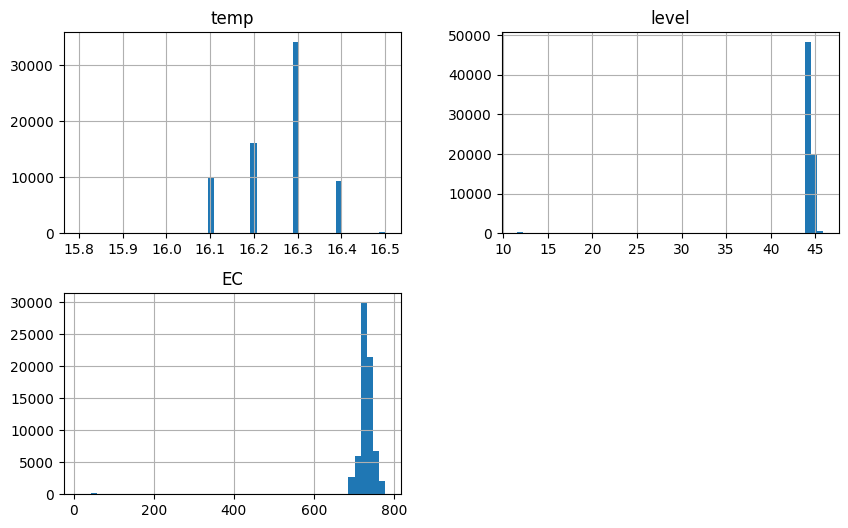

In [12]:
df.hist(bins=50, figsize=(10,6))
plt.show()

<Axes: >

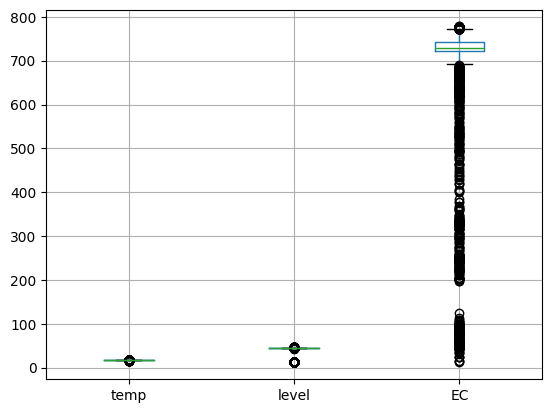

In [13]:
df.boxplot( )

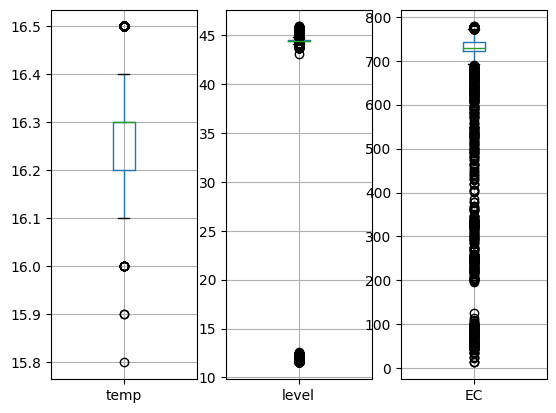

In [14]:
plt.subplot(1, 3, 1)
df.boxplot(column='temp', return_type='both')
plt.subplot(1, 3, 2)
df.boxplot(column='level', return_type='both')
plt.subplot(1, 3, 3)
df.boxplot(column='EC', return_type='both')
plt.show( )

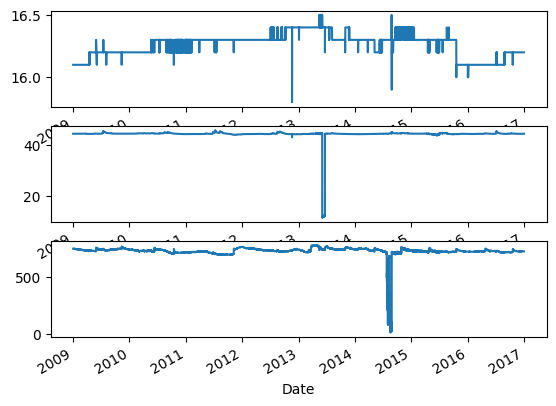

In [15]:
plt.subplot(3, 1, 1)
df['temp'].plot( )
plt.subplot(3, 1, 2)
df['level'].plot()
plt.subplot(3, 1, 3)
df['EC'].plot( )
plt.show( )